# Digit recognizer for kaggle
https://www.kaggle.com/competitions/digit-recognizer/data

In [121]:
import numpy as np 
import matplotlib.pyplot as plt
import cv2
import os
import pandas as pd
from math import ceil
from tensorflow.keras.utils import to_categorical

In [4]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [8]:
print("train shape info {}".format(train.shape))
print("test shape info {}".format(test.shape))

train shape info (42000, 785)
test shape info (28000, 784)


In [5]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
train.dtypes

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 785, dtype: object

In [69]:
test.dtypes

pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
pixel4      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 784, dtype: object

In [11]:
sorted(train["label"].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

**Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).**

We have to parse the dataset into readables images

In [18]:
first_image=list(train.iloc[0,:])
len(first_image)

785

In [35]:

result= np.array([[0 for x in range(28)] for y in range(28)])

for x in range(0,784):
    result[x//28][x%28]=first_image[x]
    

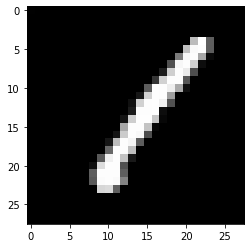

In [40]:
plt.imshow(result,cmap='gray')

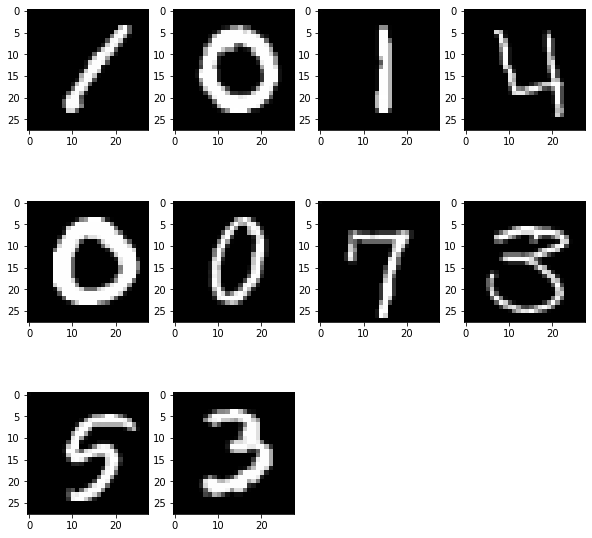

In [51]:
fig=plt.figure(figsize=(10,10))
for i in range(0,10):
    first_image=list(train.iloc[i,:])
    result= np.array([[0 for x in range(28)] for y in range(28)])

    for x in range(0,784):
        result[x//28][x%28]=first_image[x]
    
    plt.subplot(3, 4, i+1)
    plt.imshow(result,cmap='gray')
    
plt.show()
  
    

In [155]:

X_train=[]
X_test=[]
for i in range(42000):
    temp_image=list(train.iloc[i,1:])
    result= np.array([[0 for x in range(28)] for y in range(28)])

    for x in range(0,784):
        result[x//28][x%28]=temp_image[x]
    X_train.append(result)
        
    
X_train=np.array(X_train)

for i in range(28000):
    temp_image=list(test.iloc[i,:])
    result= np.array([[0 for x in range(28)] for y in range(28)])

    for x in range(0,784):
        result[x//28][x%28]=temp_image[x]
    X_test.append(result)
    
X_test=np.array(X_test)




In [156]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

X_train = X_train/ 255.0
X_test = X_test / 255.0

In [157]:
y_train=to_categorical(train['label'])
y_train.shape

(42000, 10)

In [158]:
X_train=X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test=X_test.reshape((X_test.shape[0], 28, 28, 1))


print(X_train.shape)
print(X_test.shape)


(42000, 28, 28, 1)
(28000, 28, 28, 1)


In [159]:
from sklearn.model_selection import KFold
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])






In [160]:
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_51 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 flatten_19 (Flatten)        (None, 5408)              0         
                                                                 
 dense_38 (Dense)            (None, 100)               540900    
                                                                 
 dense_39 (Dense)            (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_______________________________________________

In [161]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1313/1313 [==============================] - 9s 7ms/step - loss: 0.1987 - accuracy: 0.9390
Epoch 2/10
1313/1313 [==============================] - 10s 8ms/step - loss: 0.0675 - accuracy: 0.9795
Epoch 3/10
1313/1313 [==============================] - 10s 8ms/step - loss: 0.0423 - accuracy: 0.9867
Epoch 4/10
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0284 - accuracy: 0.9909
Epoch 5/10
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0186 - accuracy: 0.9947
Epoch 6/10
1313/1313 [==============================] - 10s 8ms/step - loss: 0.0125 - accuracy: 0.9970
Epoch 7/10
1313/1313 [==============================] - 11s 9ms/step - loss: 0.0098 - accuracy: 0.9976 0s - loss: 0.009
Epoch 8/10
1313/1313 [==============================] - 11s 8ms/step - loss: 0.0059 - accuracy: 0.9988
Epoch 9/10
1313/1313 [==============================] - 11s 8ms/step - loss: 0.0038 - accuracy: 0.9995
Epoch 10/10
1313/1313 [==============================] - 11